In [1]:
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
#pip install 'lightgbm[pandas]'

In [3]:
df = pd.read_csv("C:/Users/SAURABH/Downloads/Complete-data.csv")
df

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1,4,2,1,4,2,5,1,5,3,2,4,2
1208,1,4,5,1,5,3,5,1,5,5,2,1,5
1209,1,3,4,1,5,2,5,2,3,3,2,2,5
1210,1,2,2,1,3,1,1,5,1,1,1,3,3


In [4]:
df.drop(columns=['Landslide'])


,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,3,3,2,2,2,1,4,2,2,3,3,2
1,1,5,2,3,1,1,4,2,5,5,2,2
2,3,4,3,2,2,4,3,2,4,5,2,2
3,1,3,3,3,5,1,2,4,3,5,3,3
4,5,4,2,1,4,1,2,4,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1207,4,2,1,4,2,5,1,5,3,2,4,2
1208,4,5,1,5,3,5,1,5,5,2,1,5
1209,3,4,1,5,2,5,2,3,3,2,2,5
1210,2,2,1,3,1,1,5,1,1,1,3,3


# **EDA**

In [5]:
df.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Landslide      1212 non-null   int64
 1   Aspect         1212 non-null   int64
 2   Curvature      1212 non-null   int64
 3   Earthquake     1212 non-null   int64
 4   Elevation      1212 non-null   int64
 5   Flow           1212 non-null   int64
 6   Lithology      1212 non-null   int64
 7   NDVI           1212 non-null   int64
 8   NDWI           1212 non-null   int64
 9   Plan           1212 non-null   int64
 10  Precipitation  1212 non-null   int64
 11  Profile        1212 non-null   int64
 12  Slope          1212 non-null   int64
dtypes: int64(13)
memory usage: 123.2 KB


In [7]:
df.describe()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.500000,2.962046,2.977723,2.102310,2.436469,2.338284,1.948845,3.042904,2.773927,3.059406,3.813531,3.262376,2.811881
std,0.500206,1.147378,1.099658,0.669812,1.242686,1.112686,1.424345,1.239246,1.299830,1.057287,1.347799,1.039502,1.194229
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,0.500000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,1.000000,5.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
temp_cols=df.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
df=df[new_cols]

In [9]:
df.describe().round(2)

,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,Landslide
count,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.00,1212.0
mean,2.96,2.98,2.10,2.44,2.34,1.95,3.04,2.77,3.06,3.81,3.26,2.81,0.5
std,1.15,1.10,0.67,1.24,1.11,1.42,1.24,1.30,1.06,1.35,1.04,1.19,0.5
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0
25%,2.00,2.00,2.00,1.00,2.00,1.00,2.00,2.00,2.00,3.00,3.00,2.00,0.0
50%,3.00,3.00,2.00,2.00,2.00,1.00,3.00,3.00,3.00,4.00,3.00,3.00,0.5
75%,4.00,4.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,5.00,4.00,4.00,1.0
max,5.00,5.00,3.00,5.00,5.00,6.00,5.00,5.00,5.00,5.00,5.00,5.00,1.0


In [10]:
for column in df.columns[0:]:
    print(column, ': ', len(df[column].unique()), ' labels')

Aspect :  5  labels
Curvature :  5  labels
Earthquake :  3  labels
Elevation :  5  labels
Flow :  5  labels
Lithology :  6  labels
NDVI :  5  labels
NDWI :  5  labels
Plan :  5  labels
Precipitation :  5  labels
Profile :  5  labels
Slope :  5  labels
Landslide :  2  labels


Text(0.5, 0, 'Landslide')

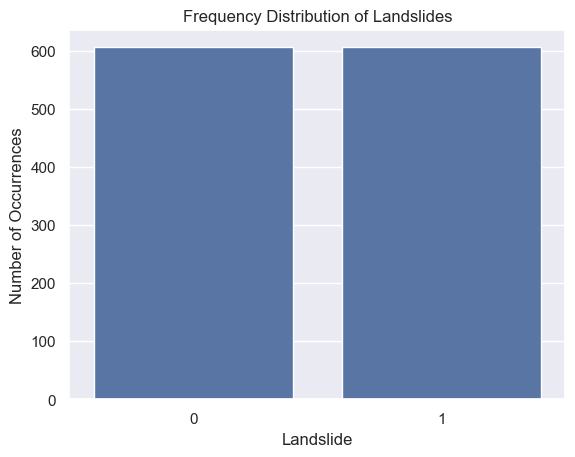

In [11]:
landslide_count = df['Landslide'].value_counts()
sns.set(style="darkgrid")
sns.countplot(x = 'Landslide', data = df)
plt.title('Frequency Distribution of Landslides')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Landslide', fontsize=12)


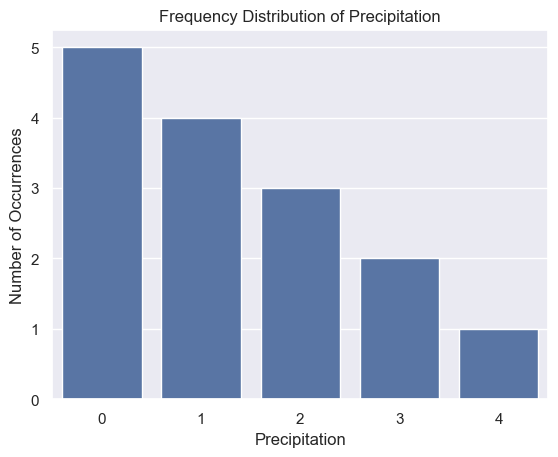

<Figure size 640x480 with 0 Axes>

In [12]:
perc_count = df['Precipitation'].value_counts()
sns.set(style="darkgrid")
sns.barplot(perc_count.index)
plt.title('Frequency Distribution of Precipitation')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Precipitation', fontsize=12)
plt.show()

plt.savefig('bar2.eps', format='eps')

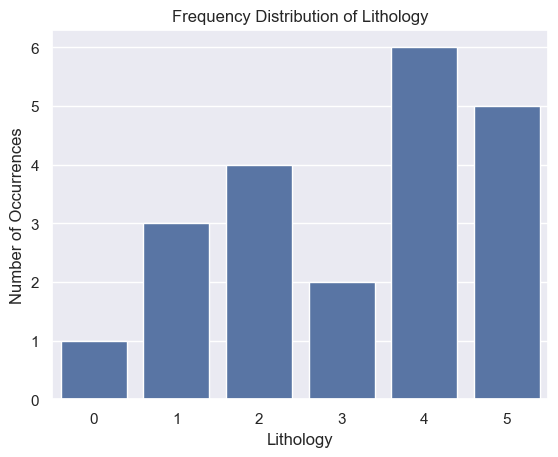

<Figure size 640x480 with 0 Axes>

In [13]:
lith_count = df['Lithology'].value_counts()
sns.set(style="darkgrid")
sns.barplot(lith_count.index)
plt.title('Frequency Distribution of Lithology')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Lithology', fontsize=12)
plt.show()

plt.savefig('bar3.eps', format='eps')

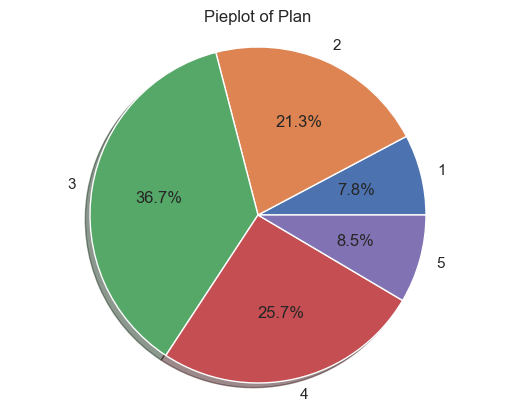

<Figure size 640x480 with 0 Axes>

In [14]:
labels = df['Plan'].astype('category').cat.categories.tolist()
counts = df['Plan'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct  show the % on plot
ax1.axis('equal')
plt.title('Pieplot of Plan')
plt.show()

plt.savefig('pie1.eps', format='eps')

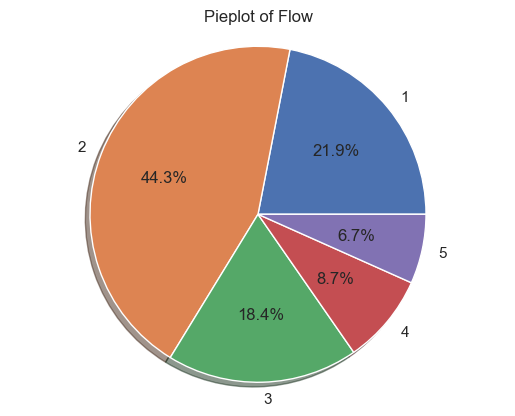

<Figure size 640x480 with 0 Axes>

In [15]:
labels = df['Flow'].astype('category').cat.categories.tolist()
counts = df['Flow'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.title('Pieplot of Flow')
plt.show()

plt.savefig('pie2.eps', format='eps')

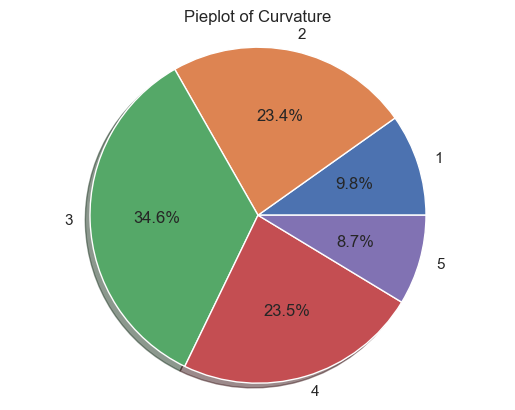

<Figure size 640x480 with 0 Axes>

In [16]:
labels = df['Curvature'].astype('category').cat.categories.tolist()
counts = df['Curvature'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is used to show the % on plot
ax1.axis('equal')
plt.title('Pieplot of Curvature')
plt.show()

plt.savefig('pie3.eps', format='eps')

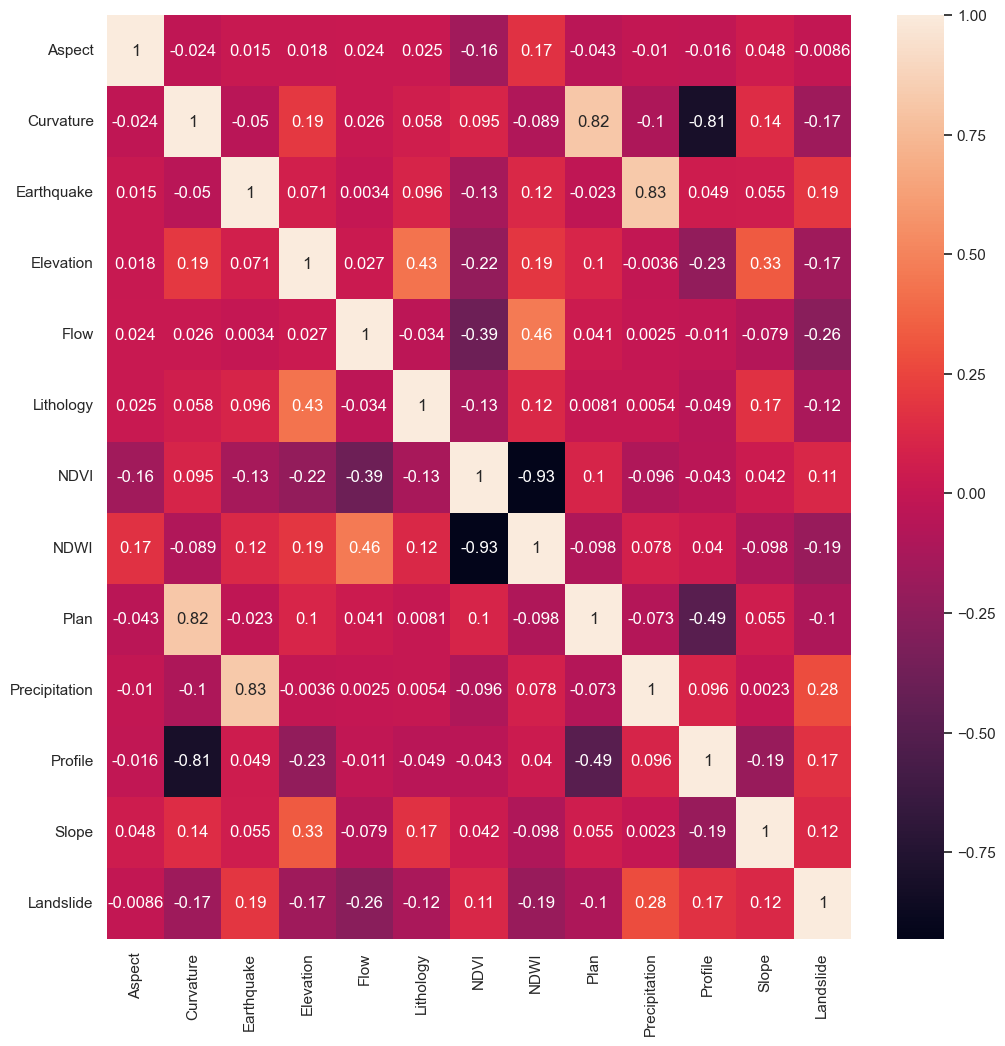

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)

plt.show()

plt.savefig('corr1.eps', format='eps')

In [18]:
df.mean()

Aspect           2.962046
Curvature        2.977723
Earthquake       2.102310
Elevation        2.436469
Flow             2.338284
Lithology        1.948845
NDVI             3.042904
NDWI             2.773927
Plan             3.059406
Precipitation    3.813531
Profile          3.262376
Slope            2.811881
Landslide        0.500000
dtype: float64

In [19]:
df.groupby(['Landslide']).mean()

,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
Landslide,,,,,,,,,,,,
0,2.971947,3.168317,1.976898,2.645215,2.628713,2.120462,2.904290,3.026403,3.168317,3.435644,3.085809,2.665017
1,2.952145,2.787129,2.227723,2.227723,2.047855,1.777228,3.181518,2.521452,2.950495,4.191419,3.438944,2.958746


In [20]:
df.corr()

,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,Landslide
Aspect,1.000000,-0.024232,0.014727,0.017998,0.024295,0.025086,-0.158561,0.168099,-0.043066,-0.010454,-0.015876,0.048420,-0.008633
Curvature,-0.024232,1.000000,-0.049595,0.193843,0.025736,0.058319,0.094625,-0.089028,0.815075,-0.104207,-0.806851,0.143316,-0.173393
Earthquake,0.014727,-0.049595,1.000000,0.071308,0.003382,0.095507,-0.134619,0.118588,-0.022582,0.825169,0.049177,0.055050,0.187313
Elevation,0.017998,0.193843,0.071308,1.000000,0.026903,0.429702,-0.217003,0.187921,0.104691,-0.003628,-0.228721,0.333029,-0.168049
Flow,0.024295,0.025736,0.003382,0.026903,1.000000,-0.033881,-0.393805,0.462291,0.041163,0.002451,-0.011119,-0.078842,-0.261124
Lithology,0.025086,0.058319,0.095507,0.429702,-0.033881,1.000000,-0.129279,0.119080,0.008051,0.005351,-0.048930,0.169103,-0.120538
NDVI,-0.158561,0.094625,-0.134619,-0.217003,-0.393805,-0.129279,1.000000,-0.931590,0.102043,-0.096063,-0.042720,0.041726,0.111900
NDWI,0.168099,-0.089028,0.118588,0.187921,0.462291,0.119080,-0.931590,1.000000,-0.097774,0.078201,0.040269,-0.098171,-0.194317
Plan,-0.043066,0.815075,-0.022582,0.104691,0.041163,0.008051,0.102043,-0.097774,1.000000,-0.072768,-0.487539,0.055292,-0.103052
Precipitation,-0.010454,-0.104207,0.825169,-0.003628,0.002451,0.005351,-0.096063,0.078201,-0.072768,1.000000,0.095657,0.002301,0.280490


# Important Features using Mutual Information Classification¶

In [21]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV

In [22]:
train_ratio = 0.8
val_ratio = 0.2
train_df, val_df = train_test_split(df, train_size = train_ratio, random_state=1)

In [23]:
features = list(df.columns.values.tolist())
df_feat = df.iloc[:, :-1]
features_wo = list(df_feat.columns.values.tolist())

In [24]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Aspect         1212 non-null   int64
 1   Curvature      1212 non-null   int64
 2   Earthquake     1212 non-null   int64
 3   Elevation      1212 non-null   int64
 4   Flow           1212 non-null   int64
 5   Lithology      1212 non-null   int64
 6   NDVI           1212 non-null   int64
 7   NDWI           1212 non-null   int64
 8   Plan           1212 non-null   int64
 9   Precipitation  1212 non-null   int64
 10  Profile        1212 non-null   int64
 11  Slope          1212 non-null   int64
dtypes: int64(12)
memory usage: 113.8 KB


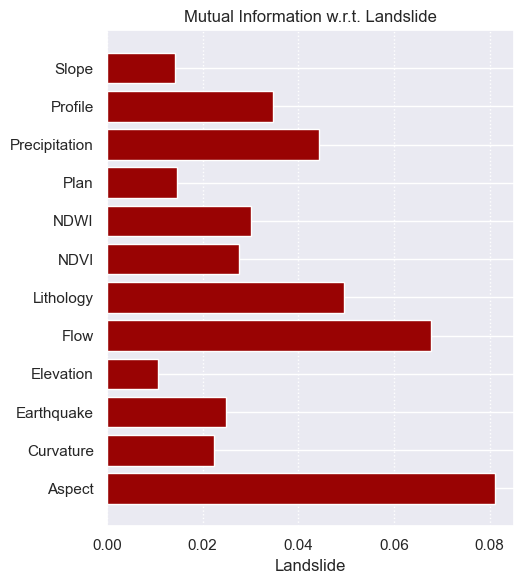

In [25]:
MI = mutual_info_classif(df[features_wo], df["Landslide"], n_neighbors=20, random_state=42)

plt.figure(figsize=(5.4, 6))
plt.barh(width=MI, y=features_wo, color="#990303") 
plt.title("Mutual Information w.r.t. Landslide")
plt.xlabel("Landslide")
plt.gca().xaxis.grid(True, linestyle=':')
plt.tight_layout()

plt.savefig('mi.eps', format='eps')


In [26]:
best3 = ['Precipitation', 'Earthquake', 'Aspect']
best5 = ['Lithology', 'Flow']
best5.extend(best3)
best8 = ['Profile', 'NDWI', 'NDVI']
best8.extend(best5)
all_feat = features_wo

feat  = [best3, best5, best8, all_feat]

In [27]:
for i in feat:
    print(df[i].head(2))

   Precipitation  Earthquake  Aspect
0              3           2       3
1              5           2       1
   Lithology  Flow  Precipitation  Earthquake  Aspect
0          1     2              3           2       3
1          1     1              5           2       1
   Profile  NDWI  NDVI  Lithology  Flow  Precipitation  Earthquake  Aspect
0        3     2     4          1     2              3           2       3
1        2     2     4          1     1              5           2       1
   Aspect  Curvature  Earthquake  Elevation  Flow  Lithology  NDVI  NDWI  \
0       3          3           2          2     2          1     4     2   
1       1          5           2          3     1          1     4     2   

   Plan  Precipitation  Profile  Slope  
0     2              3        3      2  
1     5              5        2      2  


# Feature Engineering!

In [28]:
df.head()

,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope,Landslide
0,3,3,2,2,2,1,4,2,2,3,3,2,0
1,1,5,2,3,1,1,4,2,5,5,2,2,0
2,3,4,3,2,2,4,3,2,4,5,2,2,0
3,1,3,3,3,5,1,2,4,3,5,3,3,0
4,5,4,2,1,4,1,2,4,3,3,1,4,0


Feature **Selection**   

In [29]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn import ensemble
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import GridSearchCV

In [30]:
#!pip install pca

In [31]:
from pca import pca

X_pca = df.loc[:, df.columns != 'Landslide']

model = pca()
out = model.fit_transform(X_pca)
out = model.transform(X_pca)
print(pd.DataFrame(out, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9']))
print(out)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [9] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Extracting column labels from dataframe.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
  

[scatterd] >WARNING> The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


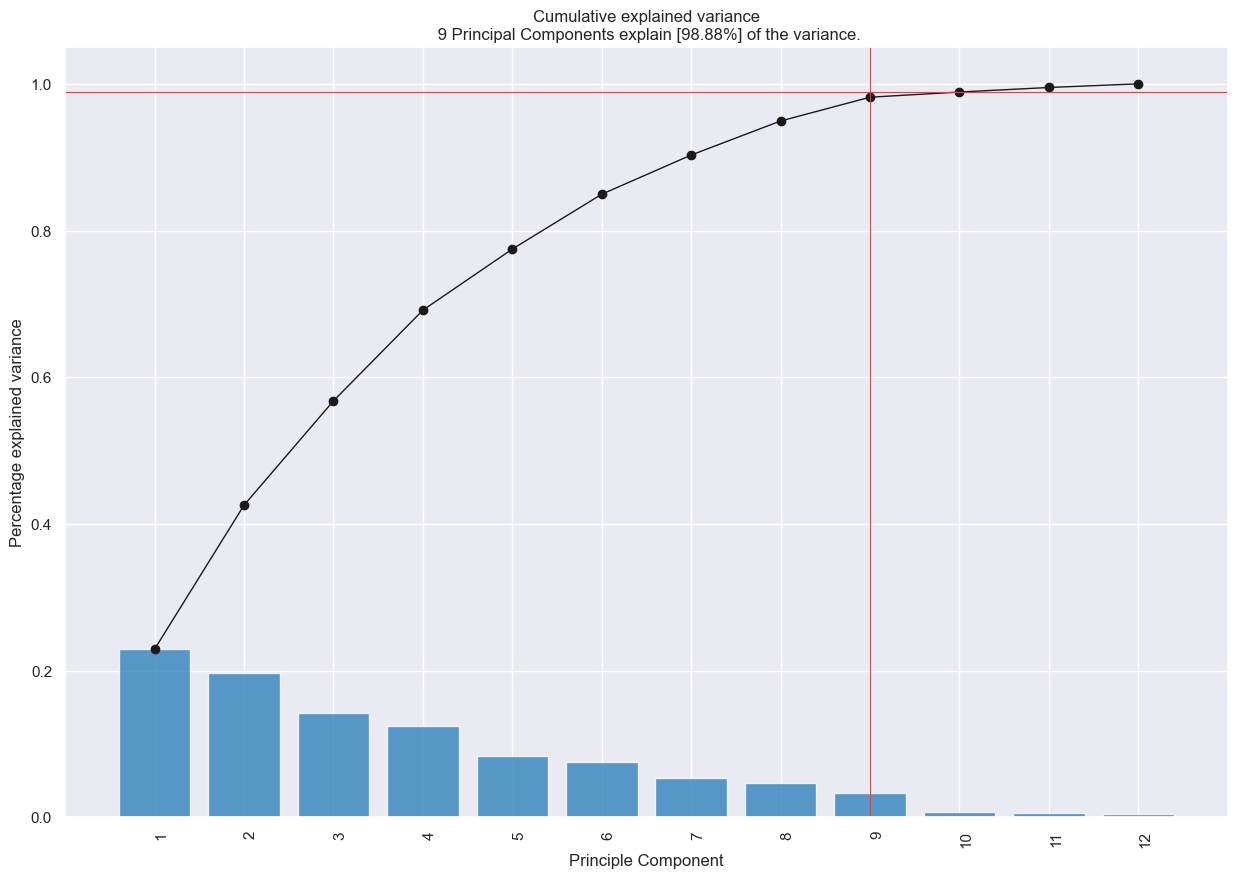

In [32]:
model.plot()

plt.savefig('pca1.eps', format='eps')

# Baseline ***Model***

In [33]:
y = df.Landslide
df1 = df.loc[:, df.columns != 'Landslide']

X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2)


In [34]:
baseline_gbm = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2,
                                          min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline_gbm.fit(X_train,y_train)
predictors_gbm=list(X_train)

print('Accuracy of the GBM on test set: {:.3f}'.format(baseline_gbm.score(X_test, y_test)))
pred_gbm=baseline_gbm.predict(X_test)
print(classification_report(y_test, pred_gbm))


Accuracy of the GBM on test set: 0.782
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       116
           1       0.80      0.78      0.79       127

    accuracy                           0.78       243
   macro avg       0.78      0.78      0.78       243
weighted avg       0.78      0.78      0.78       243



In [35]:
#pip install xgboost

In [36]:
from lightgbm import LGBMClassifier
baseline_lgbm = LGBMClassifier(learning_rate=0.1, n_estimators=100,max_depth=3,
                          #min_samples_split=2,
                          min_samples_leaf=1, subsample=1,
                          #max_features='sqrt',
                          random_state=10)
baseline_lgbm.fit(X_train,y_train)
predictors_lgbm=list(X_train)

print('Accuracy of the LGBM on test set: {:.3f}'.format(baseline_lgbm.score(X_test, y_test)))
pred_lgbm=baseline_lgbm.predict(X_test)
print(classification_report(y_test, pred_lgbm))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 479, number of negative: 490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494324 -> initscore=-0.022705
[LightGBM] [Info] Start training from score -0.022705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [38]:
# Create a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

In [39]:
from tabulate import  tabulate

# Fit the model to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test set
pred_rf = random_forest.predict(X_test)
table = [[i+1, pred_rf[i]] for i in range(len(y_test))]
print(tabulate(table, headers=['Id', 'Prediction'], tablefmt='grid'))
# Calculate and print the accuracy
accuracy_rf = random_forest.score(X_test, y_test)
print('Accuracy of the Random Forest on test set: {:.3f}'.format(accuracy_rf))

# Generate and print the classification report
print(classification_report(y_test, pred_rf))

+------+--------------+
|   Id |   Prediction |
+======+==============+
|    1 |            1 |
+------+--------------+
|    2 |            0 |
+------+--------------+
|    3 |            1 |
+------+--------------+
|    4 |            1 |
+------+--------------+
|    5 |            1 |
+------+--------------+
|    6 |            1 |
+------+--------------+
|    7 |            1 |
+------+--------------+
|    8 |            0 |
+------+--------------+
|    9 |            0 |
+------+--------------+
|   10 |            0 |
+------+--------------+
|   11 |            1 |
+------+--------------+
|   12 |            1 |
+------+--------------+
|   13 |            1 |
+------+--------------+
|   14 |            0 |
+------+--------------+
|   15 |            1 |
+------+--------------+
|   16 |            1 |
+------+--------------+
|   17 |            1 |
+------+--------------+
|   18 |            1 |
+------+--------------+
|   19 |            1 |
+------+--------------+
|   20 |        

In [40]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Create an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=1,
    colsample_bytree=1,
    objective='binary:logistic',  # For binary classification
    random_state=10
)

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
pred_xgb = xgb_classifier.predict(X_test)
from tabulate import tabulate
y_pred = xgb_classifier.predict(X_test)
headers = ['Index', 'Predicted Label']
table = [[i, labels] for i, labels in enumerate(y_pred, start=1)]
print(tabulate(table, headers=headers, tablefmt='grid'))

# Calculate and print the accuracy
accuracy_xgb = xgb_classifier.score(X_test, y_test)
print('Accuracy of XGBoost on test set: {:.3f}'.format(accuracy_xgb))

# Generate and print the classification report
print(classification_report(y_test, pred_xgb))

+---------+-------------------+
|   Index |   Predicted Label |
+=========+===================+
|       1 |                 1 |
+---------+-------------------+
|       2 |                 0 |
+---------+-------------------+
|       3 |                 1 |
+---------+-------------------+
|       4 |                 1 |
+---------+-------------------+
|       5 |                 1 |
+---------+-------------------+
|       6 |                 0 |
+---------+-------------------+
|       7 |                 1 |
+---------+-------------------+
|       8 |                 0 |
+---------+-------------------+
|       9 |                 0 |
+---------+-------------------+
|      10 |                 1 |
+---------+-------------------+
|      11 |                 1 |
+---------+-------------------+
|      12 |                 1 |
+---------+-------------------+
|      13 |                 1 |
+---------+-------------------+
|      14 |                 0 |
+---------+-------------------+
|      1

In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

# Define individual models
gbm_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1,
    max_features='sqrt',
    random_state=10
)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=10
)

# Create an ensemble of models
ensemble_model = VotingClassifier(
    estimators=[
        ('gbm', gbm_model),
        ('rf', rf_model),
        # Add more models here if desired
    ],
    voting='soft'  # 'soft' for weighted voting based on probabilities
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
pred_ensemble = ensemble_model.predict(X_test)
headers = ['Index', 'Landslide Occurence']
table = [[i, labels] for i, labels in enumerate(y_pred, start=1)]
print(tabulate(table, headers=headers, tablefmt='grid'))
print(pred_ensemble)
# Calculate and print the accuracy
accuracy_ensemble = ensemble_model.score(X_test, y_test)
print('Accuracy of the Ensemble Model on test set: {:.3f}'.format(accuracy_ensemble))

# Generate and print the classification report
print(classification_report(y_test, pred_ensemble))

+---------+-----------------------+
|   Index |   Landslide Occurence |
+=========+=======================+
|       1 |                     1 |
+---------+-----------------------+
|       2 |                     0 |
+---------+-----------------------+
|       3 |                     1 |
+---------+-----------------------+
|       4 |                     1 |
+---------+-----------------------+
|       5 |                     1 |
+---------+-----------------------+
|       6 |                     0 |
+---------+-----------------------+
|       7 |                     1 |
+---------+-----------------------+
|       8 |                     0 |
+---------+-----------------------+
|       9 |                     0 |
+---------+-----------------------+
|      10 |                     1 |
+---------+-----------------------+
|      11 |                     1 |
+---------+-----------------------+
|      12 |                     1 |
+---------+-----------------------+
|      13 |                 

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=10)

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
pred_svm = svm_classifier.predict(X_test)


# Calculate and print the accuracy
accuracy_svm = svm_classifier.score(X_test, y_test)
print('Accuracy of the SVM on test set: {:.3f}'.format(accuracy_svm))

# Generate and print the classification report
print(classification_report(y_test, pred_svm))

Accuracy of the SVM on test set: 0.786
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       116
           1       0.79      0.80      0.80       127

    accuracy                           0.79       243
   macro avg       0.79      0.79      0.79       243
weighted avg       0.79      0.79      0.79       243



In [43]:
from tabulate import tabulate
y_pred = svm_classifier.predict(X_test)
headers = ['Index', 'Predicted Label']
table = [[i, labels] for i, labels in enumerate(y_pred, start=1)]
print(tabulate(table, headers=headers, tablefmt='grid'))

+---------+-------------------+
|   Index |   Predicted Label |
+=========+===================+
|       1 |                 1 |
+---------+-------------------+
|       2 |                 0 |
+---------+-------------------+
|       3 |                 1 |
+---------+-------------------+
|       4 |                 1 |
+---------+-------------------+
|       5 |                 1 |
+---------+-------------------+
|       6 |                 1 |
+---------+-------------------+
|       7 |                 1 |
+---------+-------------------+
|       8 |                 0 |
+---------+-------------------+
|       9 |                 0 |
+---------+-------------------+
|      10 |                 0 |
+---------+-------------------+
|      11 |                 1 |
+---------+-------------------+
|      12 |                 1 |
+---------+-------------------+
|      13 |                 1 |
+---------+-------------------+
|      14 |                 0 |
+---------+-------------------+
|      1

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

# Define the GBM model
gbm_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1,
    max_features='sqrt',
    random_state=10
)

# Define the SVM model
svm_model = SVC(probability=True, random_state=10)  # Use probability=True to enable soft voting

# Create an ensemble of models
ensemble_model = VotingClassifier(
    estimators=[
        ('gbm', gbm_model),
        ('svm', svm_model),
        ('lgbm', LGBMClassifier())
    ],
    voting='soft'  # 'soft' for weighted voting based on probabilities
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
pred_ensemble = ensemble_model.predict(X_test)

# Calculate and print the accuracy
accuracy_ensemble = ensemble_model.score(X_test, y_test)
print('Accuracy of the Ensemble Model on test set: {:.3f}'.format(accuracy_ensemble))

# Generate and print the classification report
print(classification_report(y_test, pred_ensemble))


[LightGBM] [Info] Number of positive: 479, number of negative: 490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494324 -> initscore=-0.022705
[LightGBM] [Info] Start training from score -0.022705
Accuracy of the Ensemble Model on test set: 0.794
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       116
           1       0.80      0.80      0.80       127

    accuracy                           0.79       243
   macro avg       0.79      0.79      0.79       243
weighted avg       0.79      0.79      0.79       243



# **Tuning of Models**



n_estimators and Learning Rate¶

In [45]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[50,100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1,
                                                            subsample=1,max_features='sqrt', random_state=10),
                                                            param_grid = p_test3, scoring='accuracy',n_jobs=4,
                                                             cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
learning_rate_gbm = tuning.best_params_.get("learning_rate")
n_estimators_gbm = tuning.best_params_.get("n_estimators")

In [46]:
p_test3a = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[50,100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =LGBMClassifier(max_depth=4, min_samples_leaf=1,
                                                subsample=1, random_state=10),
                                                param_grid = p_test3a, scoring='accuracy',n_jobs=4,
                                                cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
learning_rate_lgbm = tuning.best_params_.get("learning_rate")
n_estimators_lgbm = tuning.best_params_.get("n_estimators")

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 479, number of negative: 490
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494324 -> initscore=-0.022705
[LightGBM] [Info] Start training from score -0.022705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

Max depth

In [47]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm,n_estimators=n_estimators_gbm,
                                                            min_samples_split=2,
                                                            min_samples_leaf=1, subsample=1,max_features='sqrt',
                                                            random_state=10),
                                                            param_grid = p_test2, scoring='accuracy',n_jobs=4,
                                                            cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
max_depth_gbm = tuning.best_params_.get("max_depth")

In [48]:
p_test2a = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm,n_estimators=n_estimators_lgbm,
                                                min_samples_leaf=1, subsample=1, random_state=10),
                                                param_grid = p_test2, scoring='accuracy',n_jobs=4,
                                                cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
max_depth_lgbm = tuning.best_params_.get("max_depth")

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 479, number of negative: 490
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494324 -> initscore=-0.022705
[LightGBM] [Info] Start training from score -0.022705


First Evaluation of New Model on Test Set

In [49]:
model1 = GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,max_depth=max_depth_gbm,
                                    min_samples_split=2,
                                    min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.790
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       116
           1       0.79      0.81      0.80       127

    accuracy                           0.79       243
   macro avg       0.79      0.79      0.79       243
weighted avg       0.79      0.79      0.79       243



In [50]:
model1_lgbm = LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,
                             min_samples_leaf=1, subsample=1, random_state=10)
model1_lgbm.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the LGBM on test set: {:.3f}'.format(model1_lgbm.score(X_test, y_test)))
pred=model1_lgbm.predict(X_test)
print(classification_report(y_test, pred))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 479, number of negative: 490
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494324 -> initscore=-0.022705
[LightGBM] [Info] Start training from score -0.022705
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
Accuracy of the LGBM on test set: 0.782
[LightGBM] [Warning] min_data_

## **Min Sample Split and Min Samples Leaf**

In [51]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm,
                                                            subsample=1,max_features='sqrt', random_state=10),
                                                            param_grid = p_test4, scoring='accuracy',n_jobs=4,
                                                            cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
min_samples_leaf_gbm = tuning.best_params_.get("min_samples_leaf")

In [52]:
p_test4a = {'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,
                                                max_depth=max_depth_lgbm,
                                                subsample=1, random_state=10),
                                                param_grid = p_test4a, scoring='accuracy',n_jobs=4,
                                                cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
min_samples_leaf_lgbm = tuning.best_params_.get("min_samples_leaf")

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Info] Number of positive: 479, number of negative: 490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494324 -> initscore=-0.022705
[LightGBM] [Info] Start training from score -0.022705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

Max Features

In [53]:
p_test5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm,
                                                            min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                                                            subsample=1,
                                                            random_state=10), param_grid = p_test5, scoring='accuracy',
                                                            n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
max_features_gbm = tuning.best_params_.get("max_features")

Subsample

In [54]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm,
                                                            min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                                                            max_features=max_features_gbm ,
                                                            random_state=10), param_grid = p_test6, scoring='accuracy',
                                                            n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
subsample_gbm = tuning.best_params_.get("subsample")

In [55]:
p_test6a= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,
                                                max_depth=max_depth_lgbm,
                                                min_samples_leaf=min_samples_leaf_lgbm,
                                                random_state=10), param_grid = p_test6, scoring='accuracy',
                                                n_jobs=4, cv=5)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
subsample_lgbm = tuning.best_params_.get("subsample")

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Info] Number of positive: 479, number of negative: 490
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494324 -> initscore=-0.022705
[LightGBM] [Info] Start training from score -0.022705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

random_state

In [56]:
p_test7= {'random_state':list(range(0,101,2))}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                                                            max_depth=max_depth_gbm,
                                                            min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                                                            max_features=max_features_gbm ,
                                                            subsample=subsample_gbm), param_grid = p_test7,
                                                            scoring='accuracy',
                                                            n_jobs=4, cv=6)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
random_state_gbm = tuning.best_params_.get("random_state")

In [57]:
p_test7a= {'random_state':list(range(0,101,2))}

tuning = GridSearchCV(estimator =LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,
                                                max_depth=max_depth_lgbm, min_samples_leaf=min_samples_leaf_lgbm,
                                                subsample=subsample_lgbm), param_grid = p_test7a, scoring='accuracy',
                                                n_jobs=4, cv=8)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_
random_state_lgbm = tuning.best_params_.get("random_state")

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Info] Number of positive: 479, number of negative: 490
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494324 -> initscore=-0.022705
[LightGBM] [Info] Start training from score -0.022705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

Optimal Parameters

In [58]:
a1 = []
a2 = []
a3 = []
a4 = []
a5 = []
a6 = []
a7 = []
a8 = []

In [59]:
a1.append('GBM')
a2.append(learning_rate_gbm)
a3.append(n_estimators_gbm)
a4.append(max_depth_gbm)
a5.append(min_samples_leaf_gbm)
a6.append(max_features_gbm)
a7.append(subsample_gbm)
a8.append(random_state_gbm)

opt_par = pd.DataFrame({'Name': a1, 'learning_rate': a2, 'n_estimators': a3,
                         'max_depth': a4, 'min_samples_leaf': a5, 'max_features': a6,
                         'subsample_gbm': a7, 'random_state': a8})

In [60]:
a1.append('LGBM')
a2.append(learning_rate_lgbm)
a3.append(n_estimators_lgbm)
a4.append(max_depth_lgbm)
a5.append(min_samples_leaf_lgbm)
a6.append(max_features_gbm)
a7.append(subsample_lgbm)
a8.append(random_state_lgbm)

opt_par = pd.DataFrame({'Name': a1, 'learning_rate': a2, 'n_estimators': a3,
                         'max_depth': a4, 'min_samples_leaf': a5, 'max_features': a6,
                         'subsample_gbm': a7, 'random_state': a8})

In [61]:
opt_par

,Name,learning_rate,n_estimators,max_depth,min_samples_leaf,max_features,subsample_gbm,random_state
0,GBM,0.01,1500,4,1,2,1.0,10
1,LGBM,0.05,250,3,3,2,0.7,0


# Evaluation of Final Model on Test Set

In [62]:
new=GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                               max_depth=max_depth_gbm, min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                               max_features=max_features_gbm, subsample=subsample_gbm, random_state=random_state_gbm)
new.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test)

print(classification_report(y_test, pred)) 

Accuracy of the GBM on test set: 0.798
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       116
           1       0.81      0.80      0.81       127

    accuracy                           0.80       243
   macro avg       0.80      0.80      0.80       243
weighted avg       0.80      0.80      0.80       243



In [63]:
new_lgbm=LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,
                        min_samples_leaf=min_samples_leaf_lgbm, subsample=subsample_lgbm, random_state=random_state_lgbm)
new_lgbm.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the LGBM on test set: {:.3f}'.format(new_lgbm.score(X_test, y_test)))
pred=new_lgbm.predict(X_test)
print(classification_report(y_test, pred))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Info] Number of positive: 479, number of negative: 490
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494324 -> initscore=-0.022705
[LightGBM] [Info] Start training from score -0.022705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

#Comparison of ROC AUC

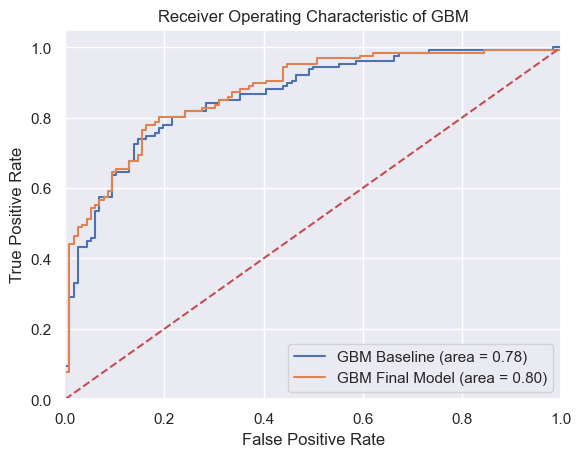

<Figure size 640x480 with 0 Axes>

In [65]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#run models
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2,
                                      min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)

model1 = GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,max_depth=max_depth_gbm,
                                    min_samples_split=2,
                                    min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)

new=GradientBoostingClassifier(learning_rate=learning_rate_gbm, n_estimators=n_estimators_gbm,
                               max_depth=max_depth_gbm, min_samples_split=20, min_samples_leaf=min_samples_leaf_gbm,
                               max_features=max_features_gbm, subsample=subsample_gbm, random_state=random_state_gbm)
new.fit(X_train,y_train)

#baseline model
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(X_test)[:,1])
#model 1
# model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
# fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model
new_roc_auc = roc_auc_score(y_test, new.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
#plt.plot(fpr1, tpr1, label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of GBM')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

plt.savefig('roc1.eps', format='eps')


In [66]:
print('Accuracy of the GBM on test set for Baseline Model: {:.3f}'.format(baseline.score(X_test, y_test)))
print('Accuracy of the GBM on test set for New Model: {:.3f}'.format(new.score(X_test, y_test)))

Accuracy of the GBM on test set for Baseline Model: 0.782
Accuracy of the GBM on test set for New Model: 0.798


[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
[LightGBM] [Info] Number of positive: 479, number of negative: 490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 969, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494324 -> initscore=-0.022705
[LightGBM] [Info] Start training from score -0.022705
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

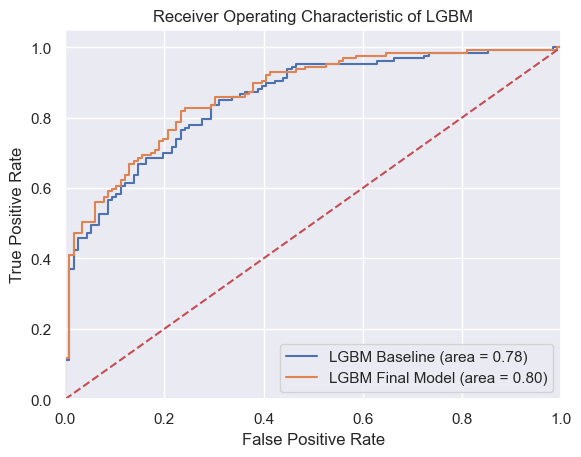

<Figure size 640x480 with 0 Axes>

In [67]:
#run models
baseline_lgbm = LGBMClassifier(learning_rate=0.1, n_estimators=100,max_depth=3,
                               min_samples_leaf=1, subsample=1, random_state=10)
baseline_lgbm.fit(X_train,y_train)

model1_lgbm = LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,
                             min_samples_leaf=1, subsample=1, random_state=10)
model1_lgbm.fit(X_train,y_train)

new_lgbm=LGBMClassifier(learning_rate=learning_rate_lgbm, n_estimators=n_estimators_lgbm,max_depth=max_depth_lgbm,
                        min_samples_leaf=min_samples_leaf_lgbm, subsample=subsample_lgbm, random_state=random_state_lgbm)
new_lgbm.fit(X_train,y_train)

#calculate values for ROC AUC plot
#baseline model
baseline_lgbm_roc_auc = roc_auc_score(y_test, baseline_lgbm.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline_lgbm.predict_proba(X_test)[:,1])
#model 1
# model1_lgbm_roc_auc = roc_auc_score(y_test, model1_lgbm.predict(X_test))
# fpr1, tpr1, thresholds1 = roc_curve(y_test, model1_lgbm.predict_proba(X_test)[:,1])
#new tuned model
new_lgbm_roc_auc = roc_auc_score(y_test, new_lgbm.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new_lgbm.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprB, tprB, label='LGBM Baseline (area = %0.2f)' % baseline_roc_auc)
#plt.plot(fpr1, tpr1, label='LGBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, label='LGBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of LGBM')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

plt.savefig('roc2.eps', format='eps')

In [ ]:
print('Accuracy of the LGBM on test set for Baseline Model: {:.3f}'.format(baseline_lgbm.score(X_test, y_test)))
print('Accuracy of the LGBM on test set for Model1: {:.3f}'.format(model1_lgbm.score(X_test, y_test)))
print('Accuracy of the LGBM on test set for New Model: {:.3f}'.format(new_lgbm.score(X_test, y_test)))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
Accuracy of the LGBM on test set for Baseline Model: 0.790
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
Accuracy of the LGBM on test set for Model1: 0.790
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=1. Current value: min_data_in_leaf=1
Accuracy of the LGBM on test set for New Model: 0.790
